### 1. Understanding Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### 2. Data Collection 

####             2.1 Import libraries

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 2.2 Import dataset 

In [3]:
df = pd.read_csv('data/student.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


observation: this dataset has 5 independent data and 3 dependent data

In [5]:
df.shape

(1000, 8)

observation: 1000 rows 8 coloumns are given in original dataset
    
    gender--> female/male
    race ---> group A,B,C,D,E
    parental_level_of_education	--->some college,associate's degree,high school ,some high school,bachelor's degree,master's degree 
    lunch---> standard,free/reduced
    test_preparation_course--> none,completed
    math_score	
    reading_score	
    writing_score
    
    

### 3. Data checks to perform

#### 3.1 Check Missing values

In [34]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
Total Test Score               0
Average                        0
dtype: int64

observation: None of the values are missing in this dataset

#### 3.2 Check duplicate values

In [7]:
df.duplicated().sum()

0

No duplicates in this dataset

#### 3.3 Check datatype

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


observation: 3 Numerical and 5 categorical values

#### 3.4 Checking the Number of unique values of each columns


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

observation:: These number says, theses many different values for each coloumns

#### 3.5 Check statistics of dataset


In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### 3.6 Exploring dataset

In [11]:
Categories = ['gender','race_ethnicity','parental_level_of_education','lunch','test_preparation_course']
[print(f"Categories in {i} = ", df[i].unique()) for i in Categories ]

Categories in gender =  ['female' 'male']
Categories in race_ethnicity =  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education =  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch =  ['standard' 'free/reduced']
Categories in test_preparation_course =  ['none' 'completed']


[None, None, None, None, None]

#### 3.7 Numerical and categorical columns 

In [12]:

print("Numerical features are :")
numeric_features = [print(f"{feature}") for feature in df.columns if df[feature].dtype!='O']
print("\nCategorical features are :")
categorical_features = [print(f"{feature}") for feature in df.columns if df[feature].dtype=='O']

Numerical features are :
math_score
reading_score
writing_score

Categorical features are :
gender
race_ethnicity
parental_level_of_education
lunch
test_preparation_course


#### 3.8 Adding  2 New columns for Total score and Average 

In [13]:
df['Total Test Score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average'] = df['Total Test Score']/3

Observation: Added two new features into dataset, Total Test Score and Average

In [14]:
# Full marks of how many students 
print(f"Number of students with fullmarks in Maths  {df[df['math_score']==100]['Average'].count()} ")
print(f"Number of students with fullmarks in Writing  {df[df['writing_score']==100]['Average'].count()} ")
print(f"Number of students with fullmarks in reading  {df[df['reading_score']==100]['Average'].count()} ")
print(f"Number of students with less than 20 in Maths  {df[df['math_score']<=20]['Average'].count()} ")
print(f"Number of students with less than 20 in Writing  {df[df['writing_score']<=20]['Average'].count()} ")
print(f"Number of students with less than 20 in reading  {df[df['reading_score']<=20]['Average'].count()} ")

Number of students with fullmarks in Maths  7 
Number of students with fullmarks in Writing  14 
Number of students with fullmarks in reading  17 
Number of students with less than 20 in Maths  4 
Number of students with less than 20 in Writing  3 
Number of students with less than 20 in reading  1 


Observation: Students performed worst in maths, and best in reading

#### 4 Exploring Data Analysis

#### 4.1 Histogram & KDE

<Axes: xlabel='Average', ylabel='Count'>

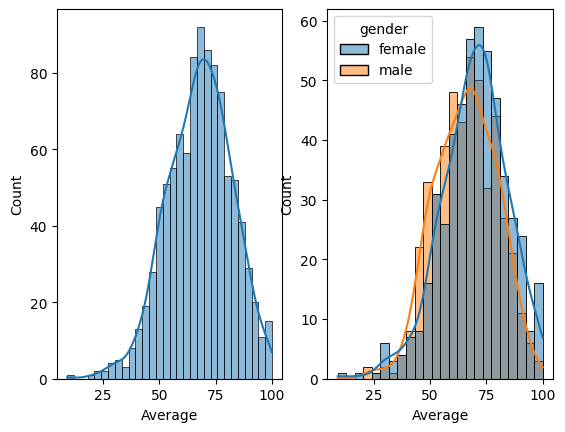

In [15]:
figure, axis = plt.subplots(1,2)
plt.subplot(121)
sns.histplot(data= df, x= 'Average', bins=30, kde=True)
plt.subplot(122)
sns.histplot(data= df, x= 'Average', kde=True, hue='gender')

<Axes: xlabel='Total Test Score', ylabel='Count'>

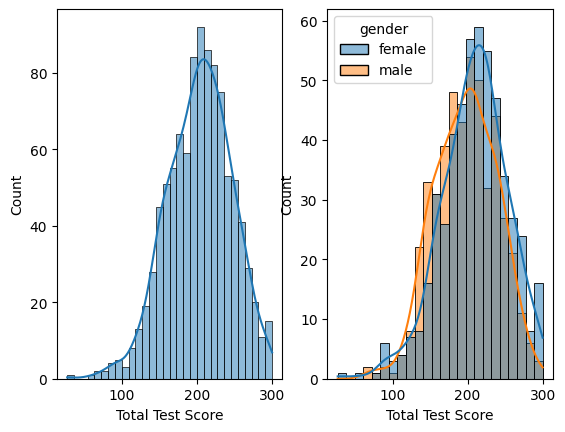

In [16]:
figure, axis = plt.subplots(1,2)
plt.subplot(121)
sns.histplot(data= df, x='Total Test Score', bins=30, kde=True)
plt.subplot(122)
sns.histplot(data= df, x='Total Test Score', kde=True, hue='gender')

Observation: Female students perform well than Male

<Axes: xlabel='Average', ylabel='Count'>

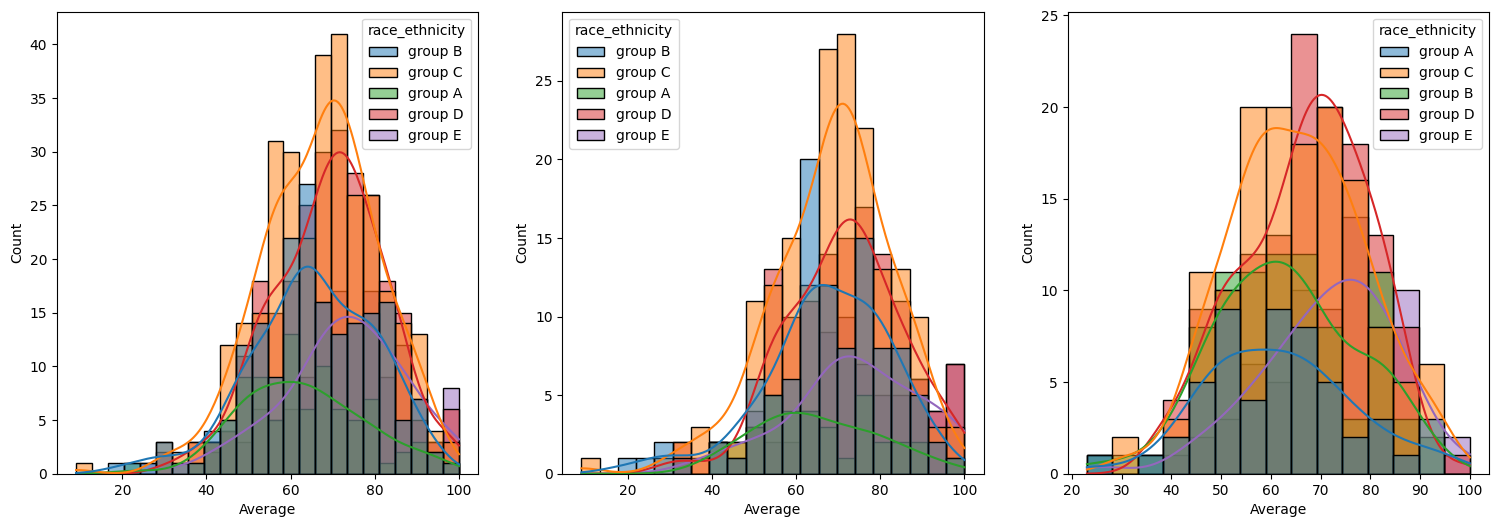

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race_ethnicity')

<Axes: xlabel='Average', ylabel='Count'>

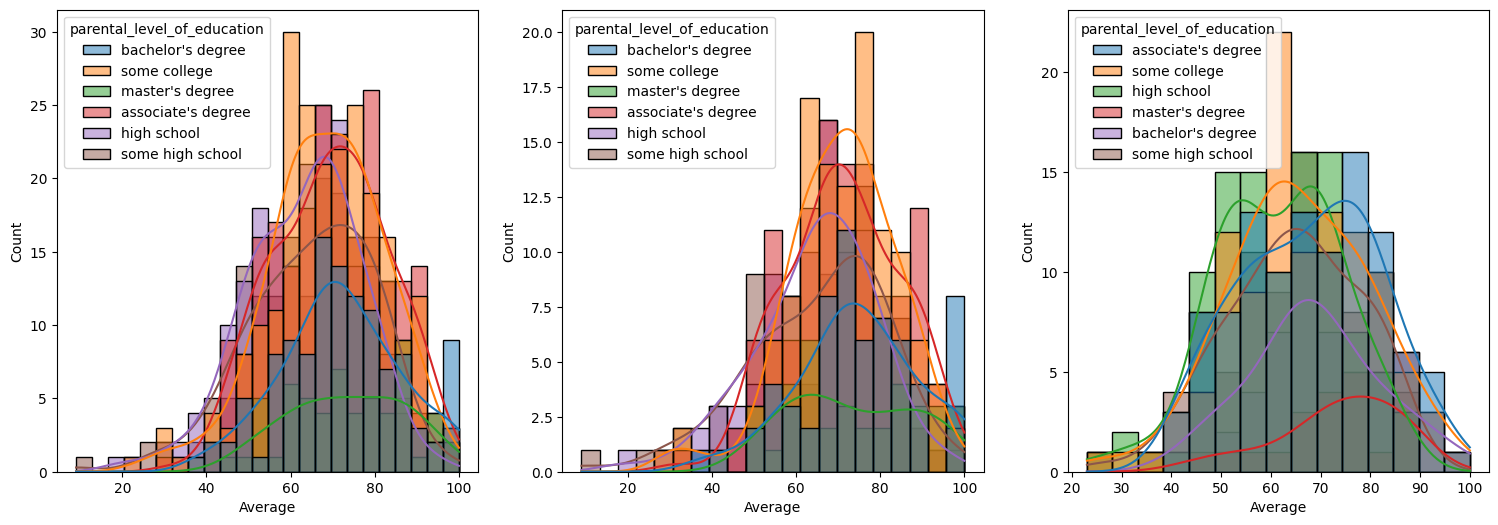

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental_level_of_education')

<Axes: xlabel='Average', ylabel='Count'>

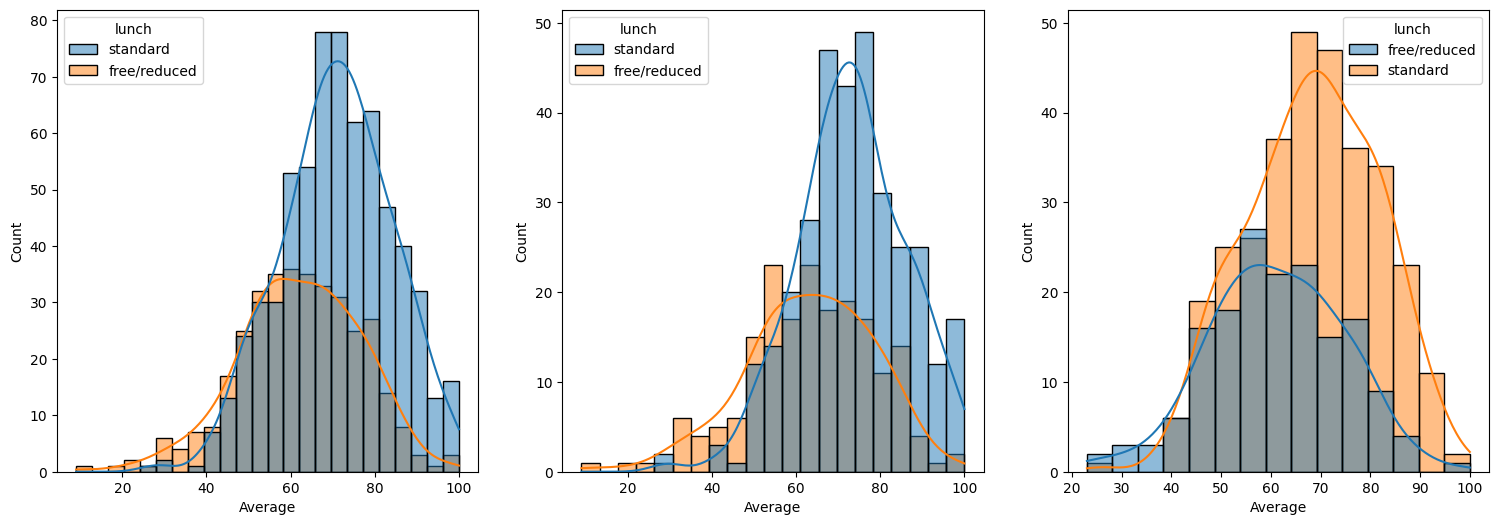

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')

<Axes: xlabel='Average', ylabel='Count'>

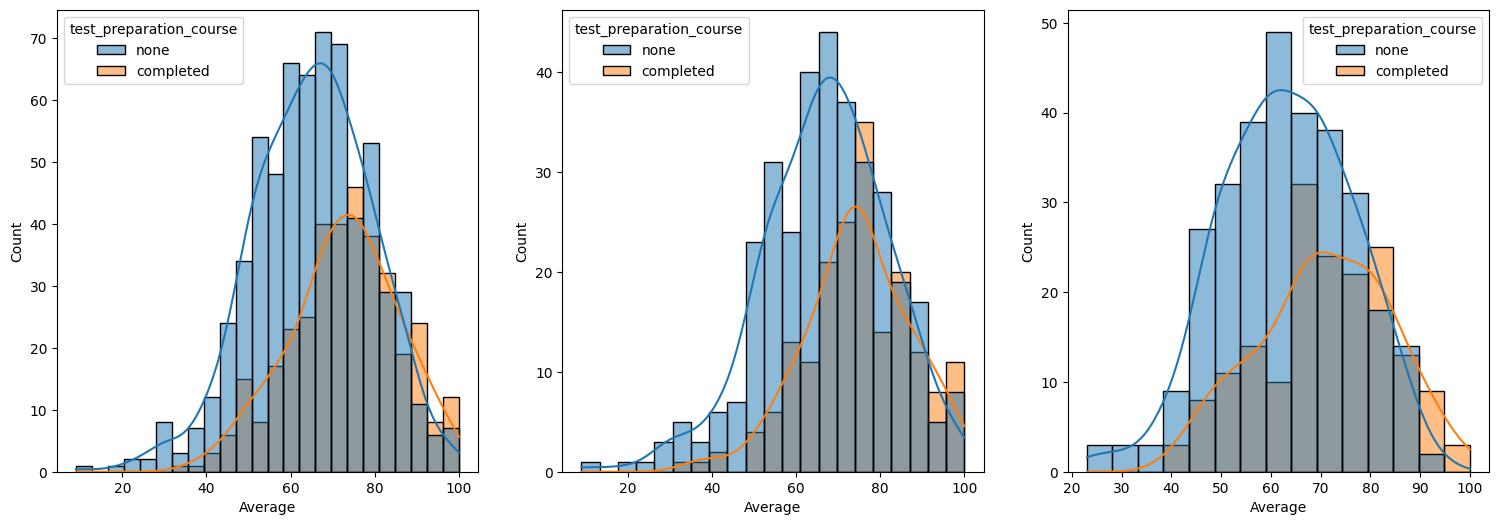

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='test_preparation_course')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='test_preparation_course')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='test_preparation_course')

<Axes: xlabel='Average', ylabel='Count'>

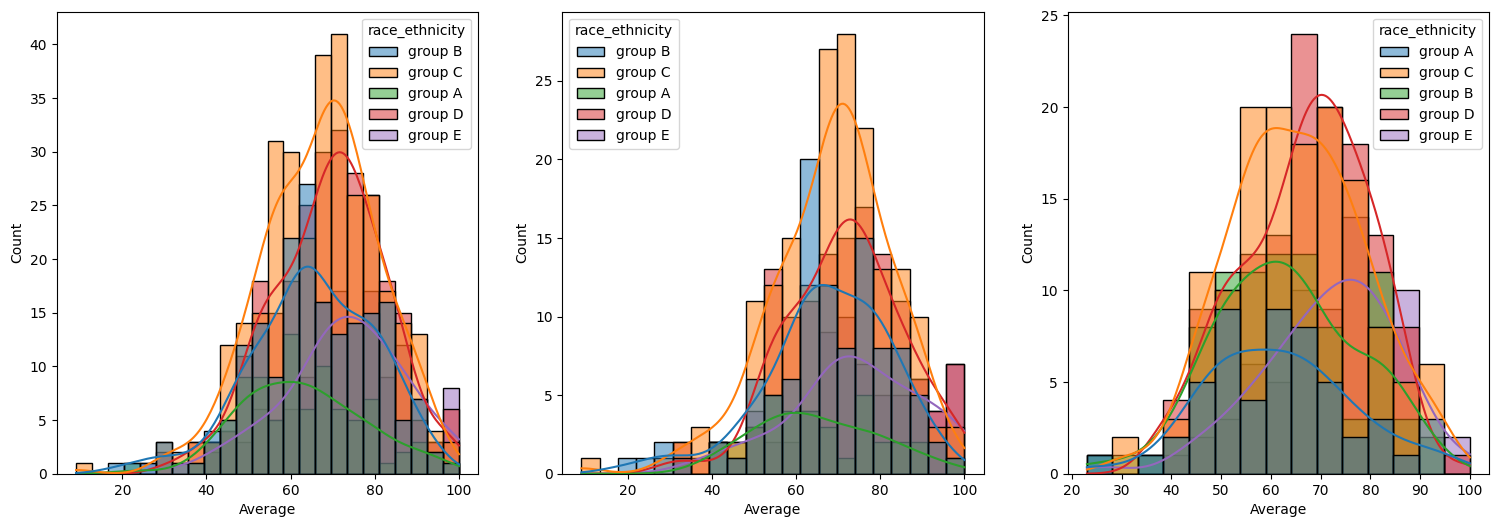

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race_ethnicity')

<Axes: title={'center': 'WRITINGSCORES'}, ylabel='writing_score'>

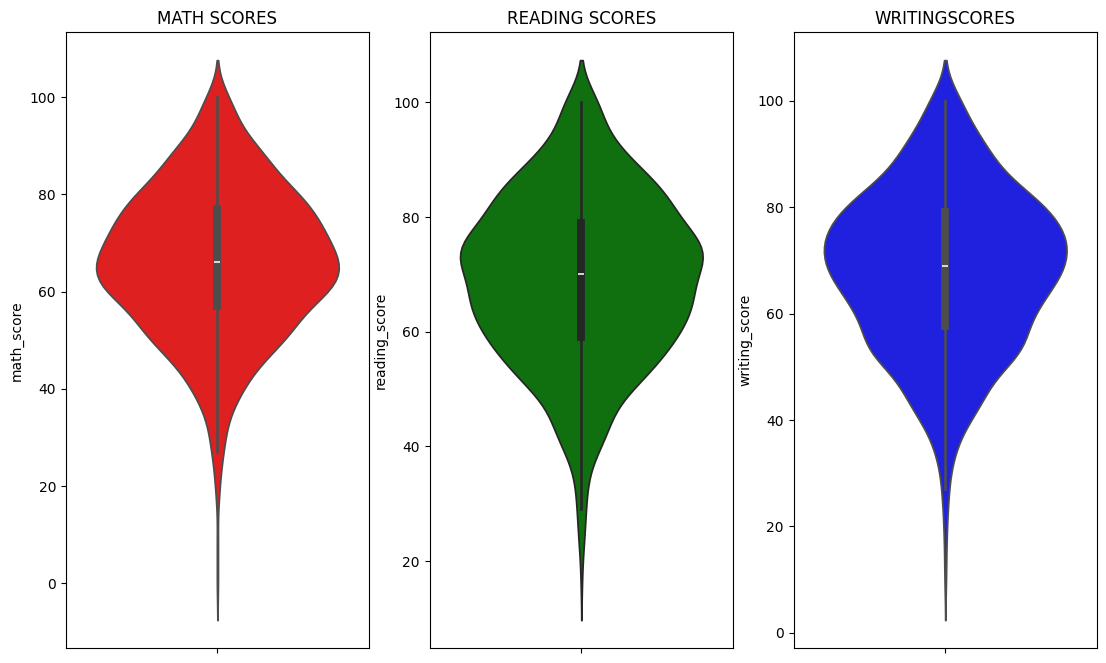

In [22]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red')
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green')
plt.subplot(1, 4, 3)
plt.title('WRITINGSCORES')
sns.violinplot(y='writing_score',data=df,color='blue')

#### 4.2 Multivariate Analysis using Pie-Plot


(-1.25, 1.25, -1.25, 1.25)

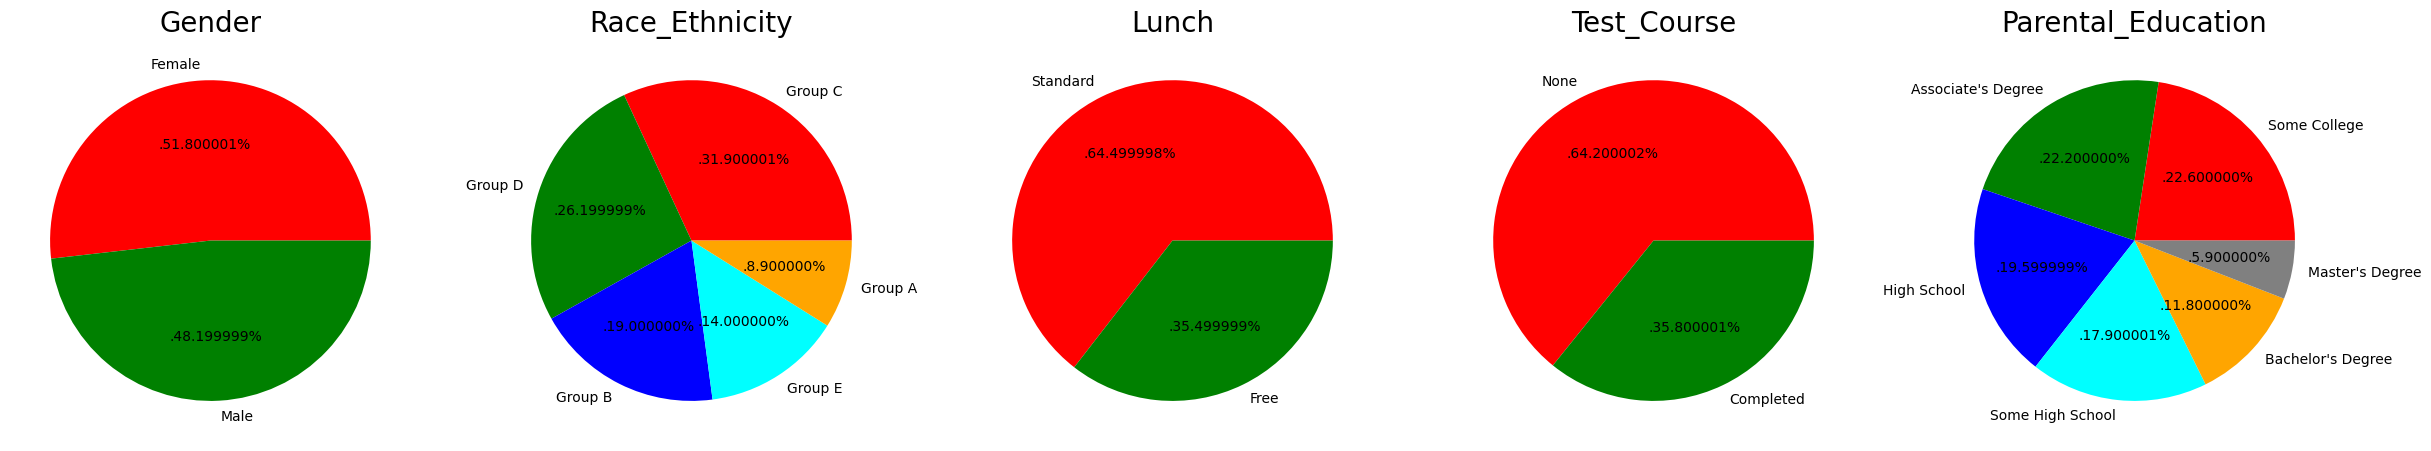

In [23]:
plt.rcParams['figure.figsize'] = (30, 12)
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test_Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental_Education', fontsize = 20)
plt.axis('off')


#### 4.3 Featurewise Visualitation

#### 4.4.1 GENDER COLUMN


### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

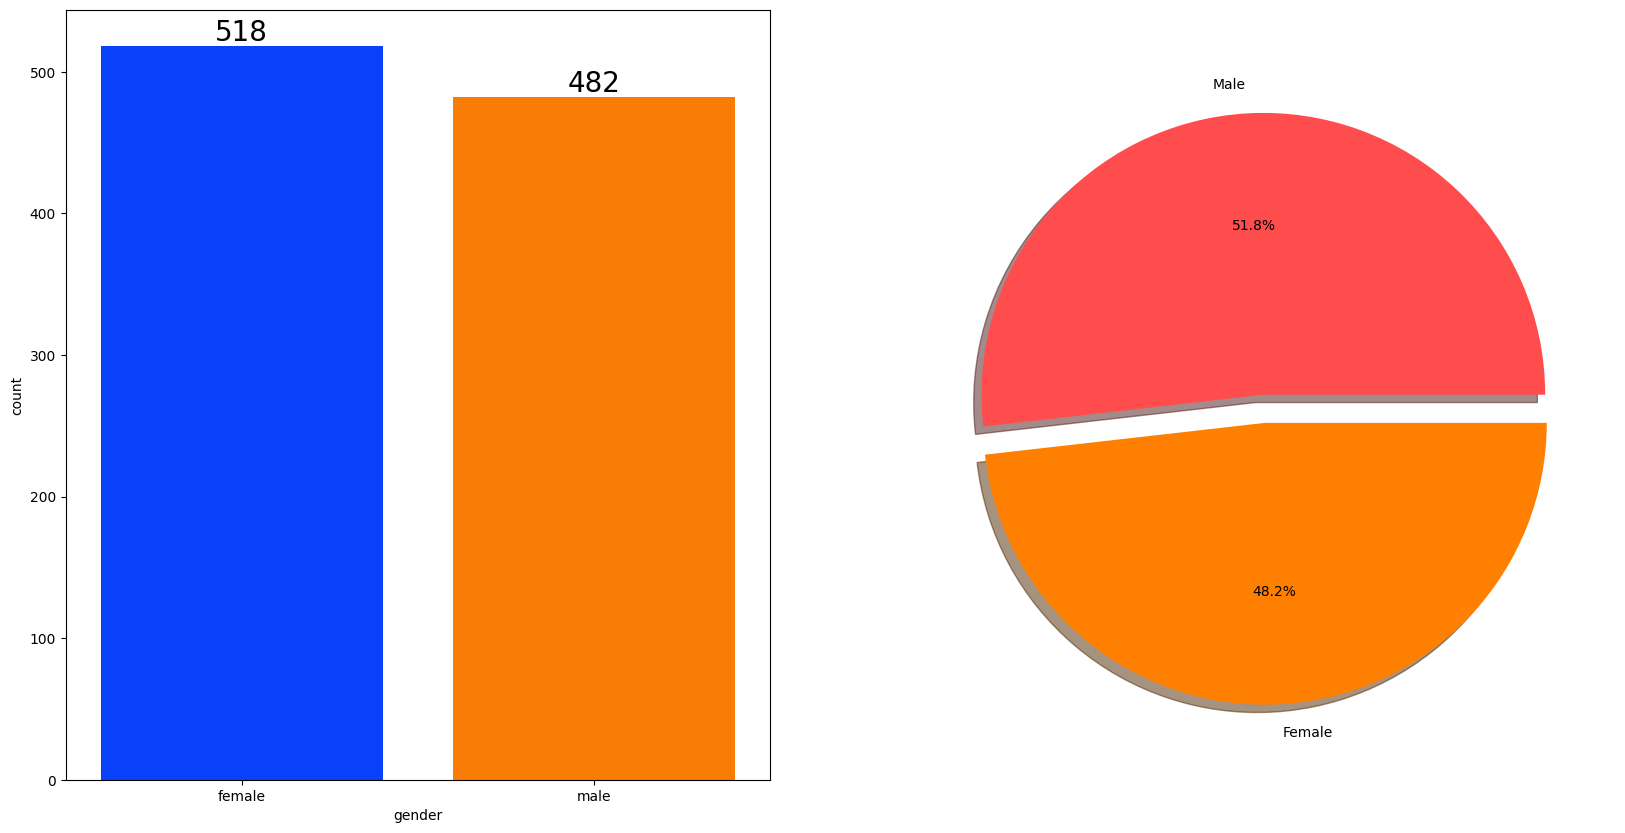

In [24]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Observation: Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [25]:
# plt.figure(figsize=(10, 8))

# X = ['Total Average','Math Average']
# female_group=gender_group.get_group('female') 
# female_scores = female_group[['Average', 'math_score']]
# male_group=gender_group.get_group('male') 
# male_scores = male_group[['Average', 'math_score']]

# X_axis = np.arange(len(X))
  
# plt.bar(X_axis-0.2, male_scores, 0.4, label = 'male')
# # plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'female')
  
# plt.xticks(X_axis, X)
# plt.ylabel("Marks")
# plt.title("Total average v/s Math average marks of both the genders")
# plt.legend()
# plt.show()

### Univariate analysis of Race_ethenicity

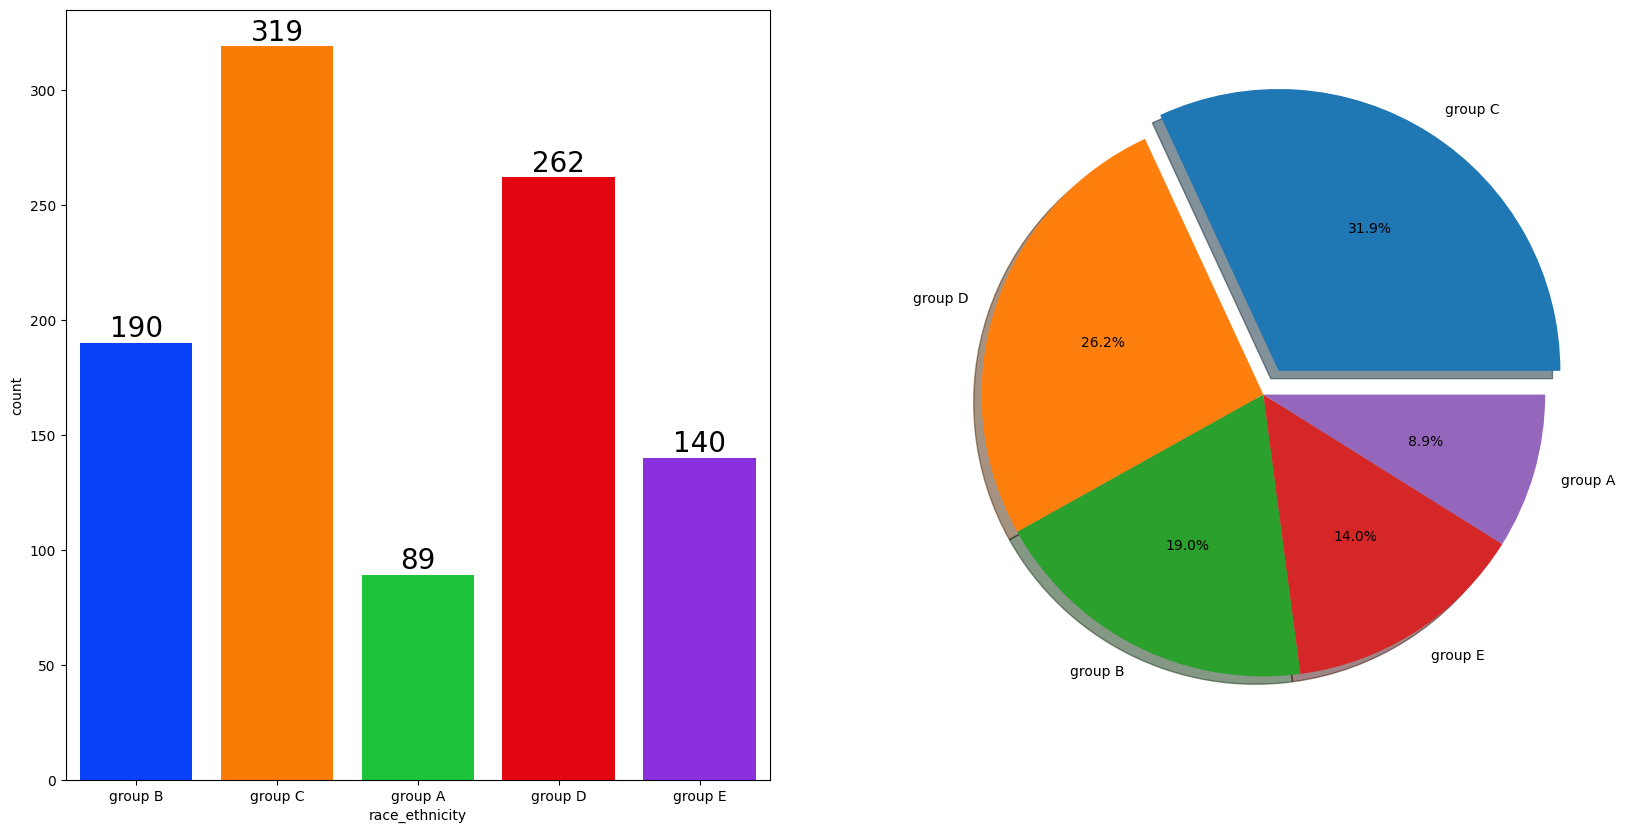

In [26]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

### Bivariate analysis of Race_Ethinicity

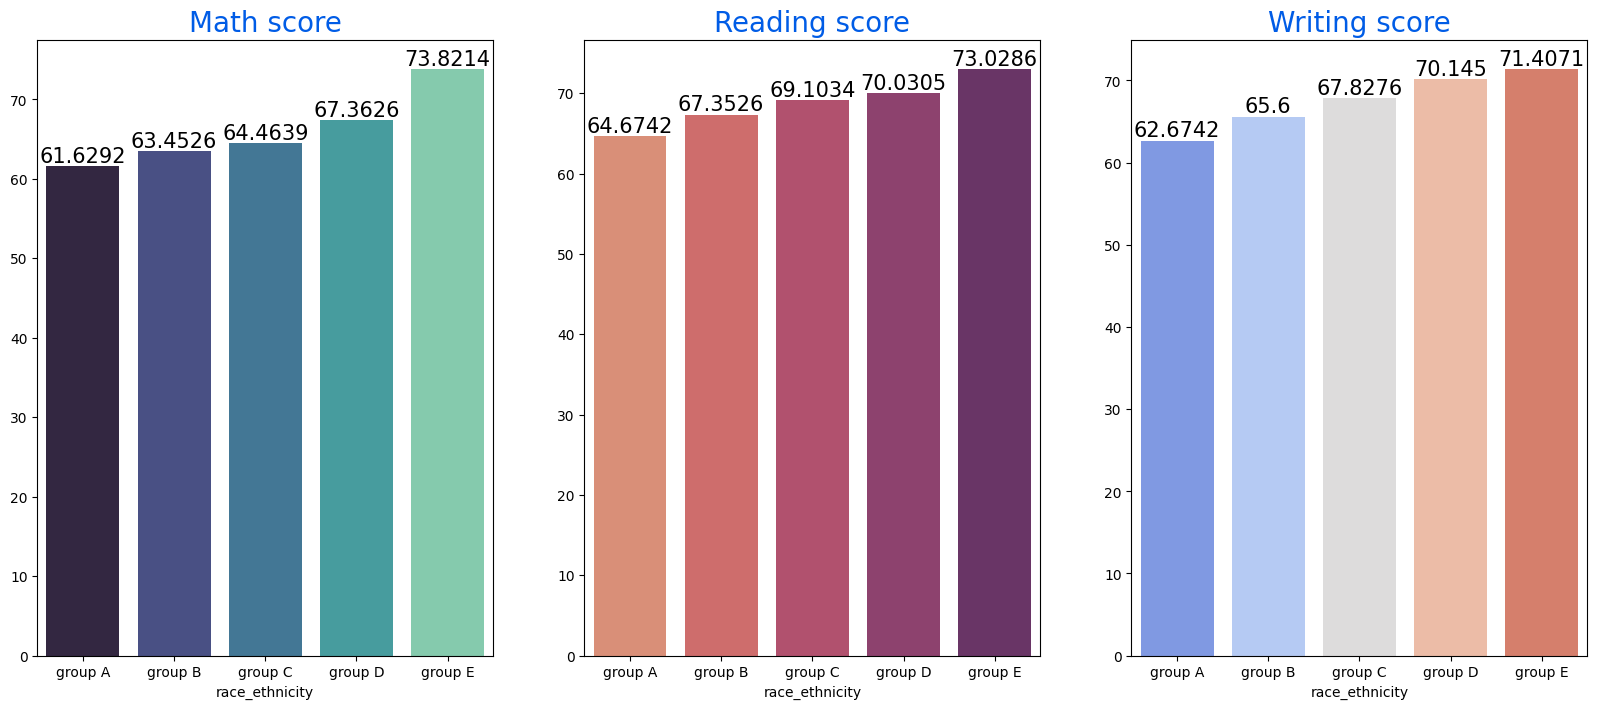

In [27]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### Univariate of  parental_level_of_education

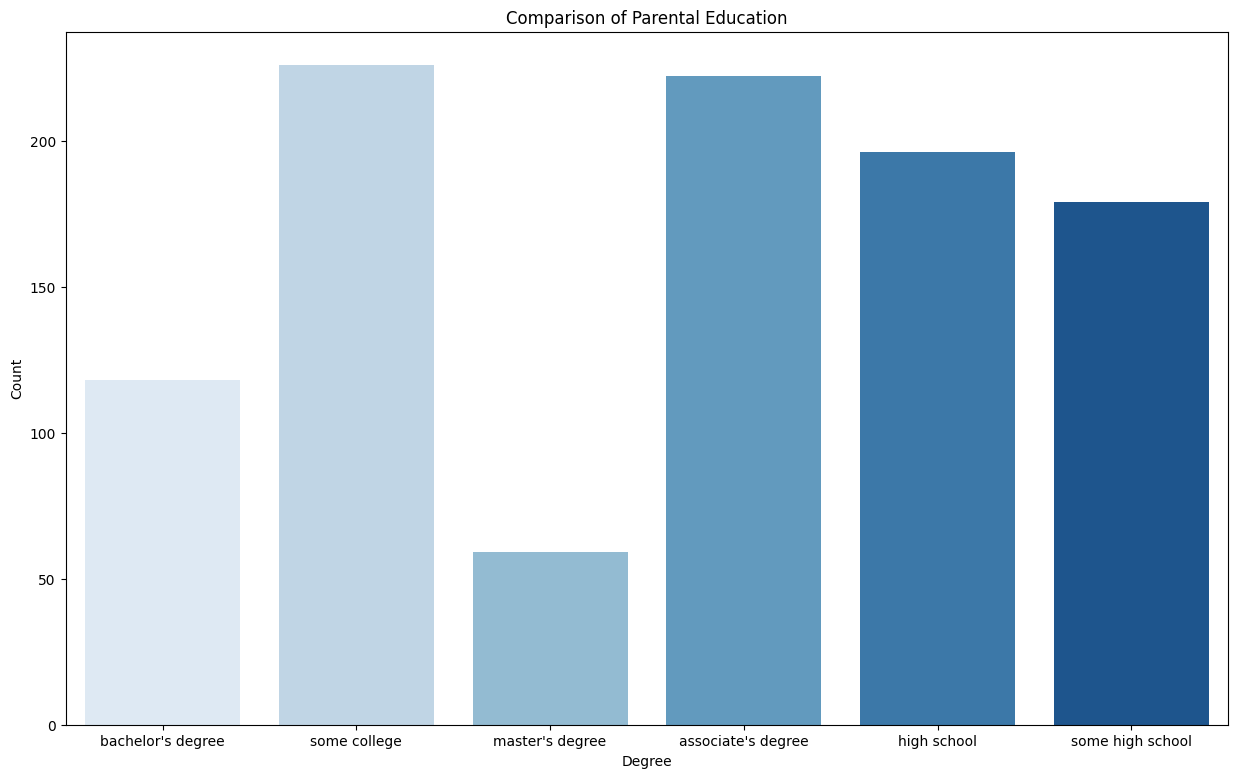

In [28]:
plt.rcParams['figure.figsize'] = (15, 9)
import seaborn as sns
sns.countplot(x = df['parental_level_of_education'], palette='Blues')

plt.title('Comparison of Parental Education')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()


### Univariate of Lunch (How Lunch impacting the performance)

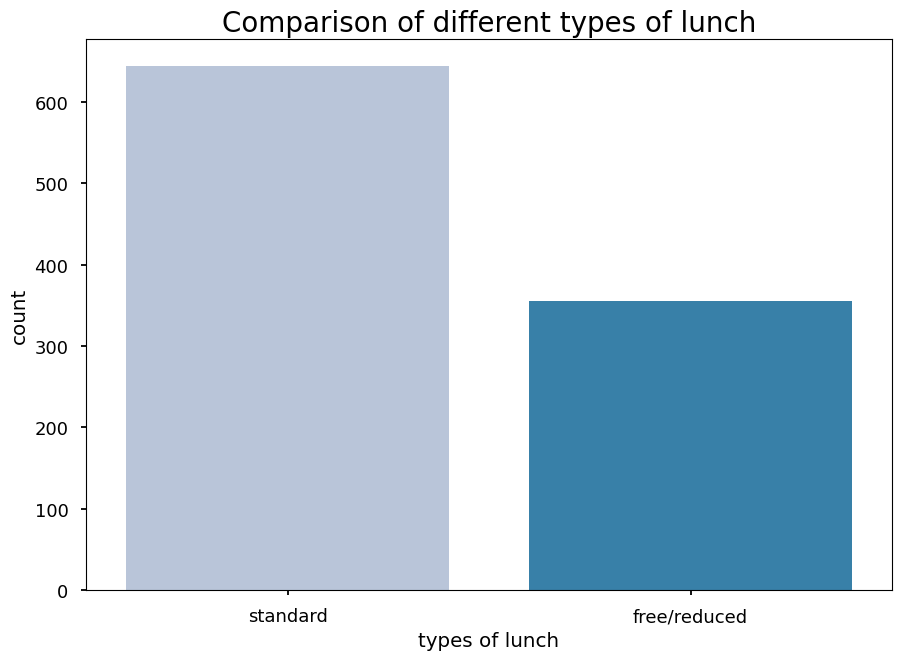

In [29]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(x=df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Bivariate of lunch

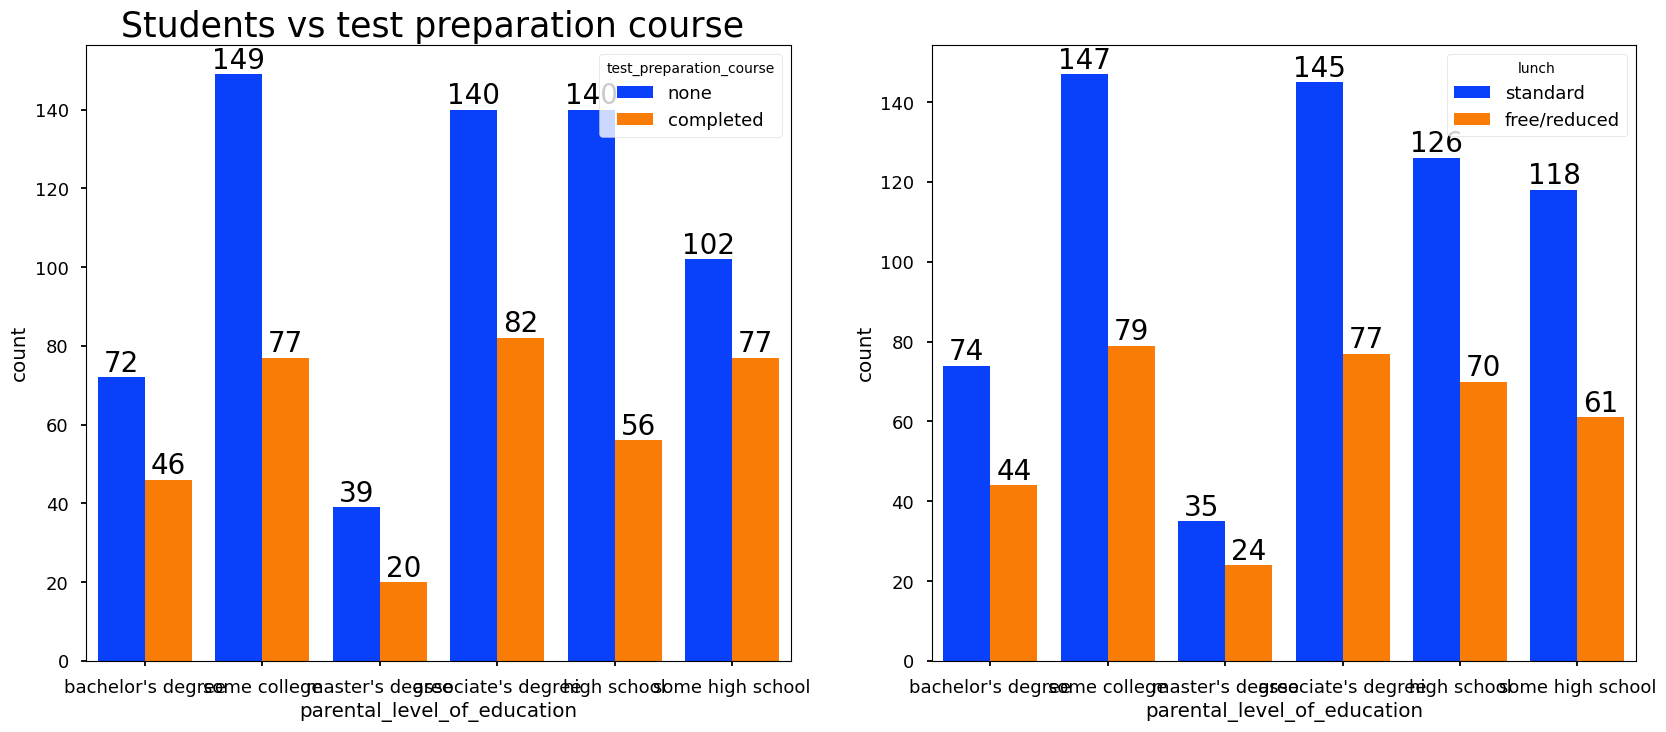

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  

<Axes: xlabel='lunch', ylabel='writing_score'>

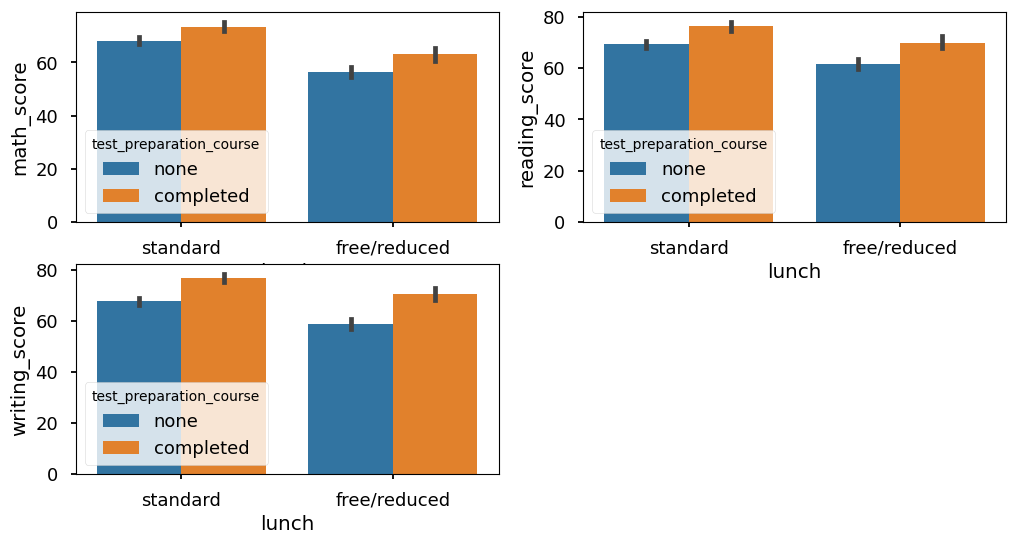

In [31]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

Observation: Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 Checking Outliars


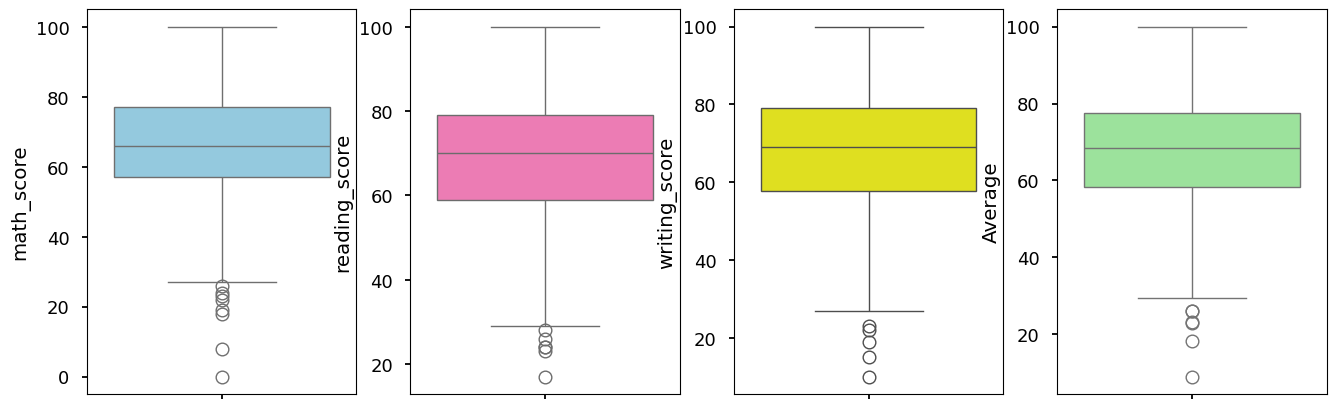

In [32]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()

#### Multivariate analysis

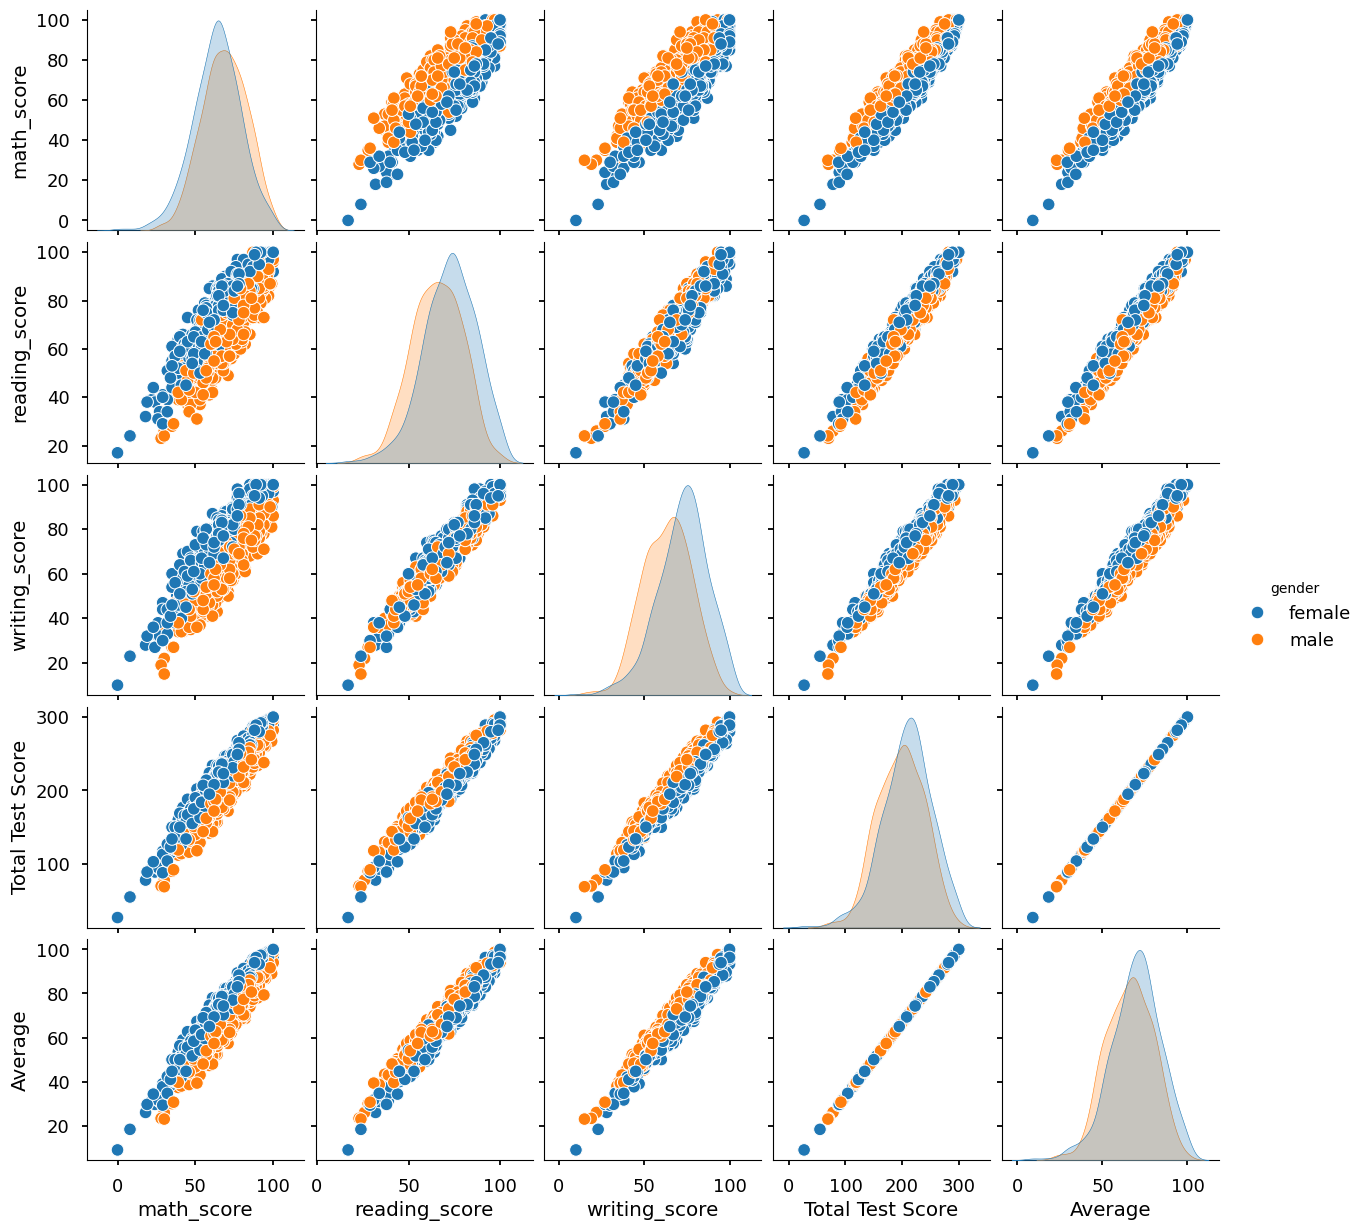

In [33]:
sns.pairplot(df,hue = 'gender')
plt.show()

Observation:
    From the above plot it is clear that all the scores increase linearly with each other.